<a href="https://colab.research.google.com/github/ashokreddy123/EVA6/blob/main/EVA6_Session_4_ashok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# The network Architecture
drop_out = 0.0
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1) #input - 1x28x28 OUtput - 8x28x28 RF - 3x3
        self.norm1 = nn.BatchNorm2d(8)
        
        self.conv2 = nn.Conv2d(8, 8, 3, padding=1) #input - 8x28x28 OUtput - 8x28x28 RF - 5x5
        self.norm2 = nn.BatchNorm2d(8)
       
        self.conv3 = nn.Conv2d(8, 8, 3, padding=1) #input - 8x28x28 OUtput - 8x28x28 RF - 7x7
        self.norm3 = nn.BatchNorm2d(8)

        self.conv3_2 = nn.Conv2d(8, 8, 3, padding=1) #input - 8x28x28 OUtput - 8x28x28 RF - 9x9
        self.norm3_2 = nn.BatchNorm2d(8)
        
        self.pool1 = nn.MaxPool2d(2, 2) #input - 8x28x28 OUtput - 8x14x14 
        self.drop1 = nn.Dropout(drop_out)
        
        self.conv4 = nn.Conv2d(8, 8, 3, padding=1) #input - 8x14x14 OUtput - 8x14x14  
        self.norm4 = nn.BatchNorm2d(8)
        self.conv5 = nn.Conv2d(8, 8, 3, padding=1) #input - 8x14x14 OUtput - 8x14x14 
        self.norm5 = nn.BatchNorm2d(8)
        self.conv6 = nn.Conv2d(8, 8, 3, padding=1) #input - 8x14x14 OUtput - 8x14x14 
        self.norm6 = nn.BatchNorm2d(8)
        self.conv6_2 = nn.Conv2d(8, 8, 3, padding=1) #input - 8x14x14 OUtput - 8x14x14 
        self.norm6_2 = nn.BatchNorm2d(8)

        self.pool2 = nn.MaxPool2d(2, 2) #input - 8x14x14 OUtput - 8x7x7
        self.drop2 = nn.Dropout(drop_out)
        
        self.conv7 = nn.Conv2d(8,16, 3, padding=1) #input - 8x7x7 OUtput - 16x7x7
        self.norm7 = nn.BatchNorm2d(16)
        self.conv8 = nn.Conv2d(16,16, 3, padding=1) #input - 16x7x7 OUtput - 16x7x7
        self.norm8 = nn.BatchNorm2d(16)
        self.conv9 = nn.Conv2d(16,16, 3, padding=1) #input - 16x7x7 OUtput - 16x7x7 
        self.norm9 = nn.BatchNorm2d(16)
        self.conv9_2 = nn.Conv2d(16,16, 3, padding=1) #input - 16x7x7 OUtput - 16x7x7
        self.norm9_2 = nn.BatchNorm2d(16)

        self.pool3 = nn.MaxPool2d(2, 2) #input - 16x7x7 OUtput - 16x3x3
        self.drop3 = nn.Dropout(drop_out)
        
        self.gap = nn.AdaptiveAvgPool2d((1,1)) #input - 16x3x3 OUtput - 16x1x1
        

        self.fc1 = nn.Linear(16, 100) #input - 16 OUtput - 100
        self.fc2 = nn.Linear(100, 10) #input - 100 OUtput - 10

    def forward(self, x):
        #print("intial",x.shape)
        #print("initial : ",x.shape)
        x = F.relu(self.conv1(x))
        x = self.norm1(x)
  
        x = F.relu(self.conv2(x))
        x = self.norm2(x)
        
        x = F.relu(self.conv3(x))
        x = self.norm3(x)

        x = F.relu(self.conv3_2(x))
        x = self.norm3_2(x)
        
        
        
        x = self.pool1(x)
        x = self.drop1(x)
        #print("layer1 : ",x.shape)
        x = F.relu(self.conv4(x))
        x = self.norm4(x)
  
        x = F.relu(self.conv5(x))
        x = self.norm5(x)
        
        x = F.relu(self.conv6(x))
        x = self.norm6(x)
        x = F.relu(self.conv6_2(x))
        x = self.norm6_2(x)

        x = self.pool2(x)
        x = self.drop2(x)
        #print("layer2 : ",x.shape)
        x = F.relu(self.conv7(x))
        x = self.norm7(x)
        x = F.relu(self.conv8(x))
        x = self.norm8(x)
        x = F.relu(self.conv9(x))
        x = self.norm9(x)
        x = F.relu(self.conv9_2(x))
        x = self.norm9_2(x)
        x = self.pool3(x)
        x = self.drop3(x)
        #print("layer3 : ",x.shape)
        """
        x = F.relu(self.conv10(x))
        x = self.norm10(x)
        x = F.relu(self.conv11(x))
        x = self.norm11(x)
        x = F.relu(self.conv12(x))
        x = self.norm12(x)
        x = F.relu(self.conv12_2(x))
        x = self.norm12_2(x)
        x = self.pool4(x)
        x = self.drop4(x)
        """
        x = self.gap(x)
        #print("After gap",x.shape)
        #x = self.flat1(x)
        #x = torch.flatten(x,0,-1)
        #print("1",x.shape)
        x = x.reshape(-1, 16)
        #print(x.shape)
        #print("After flateen",x.shape)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        #x = F.relu(x)

        x = x.view(-1, 10)
        return F.log_softmax(x)
        #return F.softmax(x)



In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
            Conv2d-3            [-1, 8, 28, 28]             584
       BatchNorm2d-4            [-1, 8, 28, 28]              16
            Conv2d-5            [-1, 8, 28, 28]             584
       BatchNorm2d-6            [-1, 8, 28, 28]              16
            Conv2d-7            [-1, 8, 28, 28]             584
       BatchNorm2d-8            [-1, 8, 28, 28]              16
         MaxPool2d-9            [-1, 8, 14, 14]               0
          Dropout-10            [-1, 8, 14, 14]               0
           Conv2d-11            [-1, 8, 14, 14]             584
      BatchNorm2d-12            [-1, 8, 14, 14]              16
           Conv2d-13            [-1, 8, 14, 14]             584
      BatchNorm2d-14            [-1, 8,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:122: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [4]:

# Getting train and test datasets from MNIST
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch, train_accuracy, training_loss_epochs):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    training_loss = 0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        training_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        #pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')
    training_loss /= len(train_loader.dataset)
    accuracy = correct*100 /len(train_loader.dataset)
    #print("train_accuracy = ",train_accuracy)
    train_accuracy.append(accuracy)
    training_loss_epochs.append(training_loss)
    return train_accuracy

def test(model, device, test_loader, test_accuracy, test_loss_epochs):
    model.eval()
    test_loss = 0
    correct = 0
    #test_accuracy = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = correct*100 /len(test_loader.dataset)
    test_accuracy.append(accuracy)
    test_loss_epochs.append(test_loss)
    return test_accuracy

    """
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    """

In [9]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.3, momentum=0.9)
train_accuracy = []
test_accuracy = []
training_loss_epochs = []
test_loss_epochs = []
for epoch in range(1,20):
    print("\nepoch no : ",epoch)
    train_accuracy = train(model, device, train_loader, optimizer, epoch,train_accuracy,training_loss_epochs)
    test_accuracy = test(model, device, test_loader,test_accuracy, test_loss_epochs)
    print("\ntrain accuracy : ", train_accuracy[epoch-1], "test accuracy : ", test_accuracy[epoch-1])


  0%|          | 0/469 [00:00<?, ?it/s]


epoch no :  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:122: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  91.48333333333333 test accuracy :  96.73

epoch no :  2


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  97.88833333333334 test accuracy :  98.9

epoch no :  3


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  98.3 test accuracy :  98.0

epoch no :  4


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  98.605 test accuracy :  98.48

epoch no :  5


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  98.825 test accuracy :  98.94

epoch no :  6


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  98.875 test accuracy :  98.78

epoch no :  7


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.02 test accuracy :  99.02

epoch no :  8


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.12666666666667 test accuracy :  99.07

epoch no :  9


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.065 test accuracy :  98.82

epoch no :  10


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.16833333333334 test accuracy :  98.85

epoch no :  11


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.245 test accuracy :  98.82

epoch no :  12


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.25333333333333 test accuracy :  99.22

epoch no :  13


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.245 test accuracy :  98.85

epoch no :  14


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.27 test accuracy :  99.08

epoch no :  15


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.35666666666667 test accuracy :  99.12

epoch no :  16


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.42 test accuracy :  99.04

epoch no :  17


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.39166666666667 test accuracy :  99.09

epoch no :  18


  0%|          | 0/469 [00:00<?, ?it/s]


train accuracy :  99.41333333333333 test accuracy :  99.16

epoch no :  19


100%|██████████| 469/469 [00:11<00:00, 41.57it/s]



train accuracy :  99.46333333333334 test accuracy :  99.18


In [11]:
for i in range(len(train_accuracy)):
  print("epoch :", i+1)
  print("Train accuracy : ",train_accuracy[i])
  print("Test accuracy : ", test_accuracy[i])
  #print(test_accuracy[i])

epoch : 1
Train accuracy :  91.48333333333333
Test accuracy :  96.73
epoch : 2
Train accuracy :  97.88833333333334
Test accuracy :  98.9
epoch : 3
Train accuracy :  98.3
Test accuracy :  98.0
epoch : 4
Train accuracy :  98.605
Test accuracy :  98.48
epoch : 5
Train accuracy :  98.825
Test accuracy :  98.94
epoch : 6
Train accuracy :  98.875
Test accuracy :  98.78
epoch : 7
Train accuracy :  99.02
Test accuracy :  99.02
epoch : 8
Train accuracy :  99.12666666666667
Test accuracy :  99.07
epoch : 9
Train accuracy :  99.065
Test accuracy :  98.82
epoch : 10
Train accuracy :  99.16833333333334
Test accuracy :  98.85
epoch : 11
Train accuracy :  99.245
Test accuracy :  98.82
epoch : 12
Train accuracy :  99.25333333333333
Test accuracy :  99.22
epoch : 13
Train accuracy :  99.245
Test accuracy :  98.85
epoch : 14
Train accuracy :  99.27
Test accuracy :  99.08
epoch : 15
Train accuracy :  99.35666666666667
Test accuracy :  99.12
epoch : 16
Train accuracy :  99.42
Test accuracy :  99.04
epoch 

In [12]:
for i in range(len(training_loss_epochs)):
  print("epoch :", i+1)
  print("Train loss : ",training_loss_epochs[i])
  print("Test loss : ", test_loss_epochs[i])

epoch : 1
Train loss :  0.2645902716577053
Test loss :  0.12298928228318691
epoch : 2
Train loss :  0.0722671169569095
Test loss :  0.039590680712461475
epoch : 3
Train loss :  0.05768202292571465
Test loss :  0.06442535272948444
epoch : 4
Train loss :  0.04492722473715743
Test loss :  0.04664489735364914
epoch : 5
Train loss :  0.03957065636515617
Test loss :  0.035922009901702405
epoch : 6
Train loss :  0.03670447835798065
Test loss :  0.04460461353734135
epoch : 7
Train loss :  0.032858354331801336
Test loss :  0.03557606543395668
epoch : 8
Train loss :  0.02969092214331031
Test loss :  0.03116485624294728
epoch : 9
Train loss :  0.029413783768067758
Test loss :  0.035054695848654956
epoch : 10
Train loss :  0.026642572351917623
Test loss :  0.03902057918328792
epoch : 11
Train loss :  0.024846413385557632
Test loss :  0.040281926487199964
epoch : 12
Train loss :  0.024584674481861295
Test loss :  0.02888849023117218
epoch : 13
Train loss :  0.024736988625861704
Test loss :  0.04163

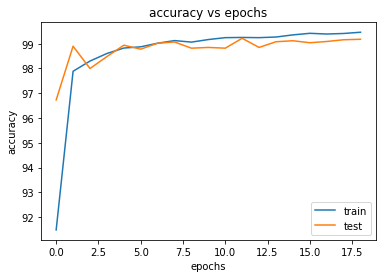

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_accuracy, label = "train")
plt.plot(test_accuracy, label = "test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy vs epochs')
plt.legend()
plt.show()

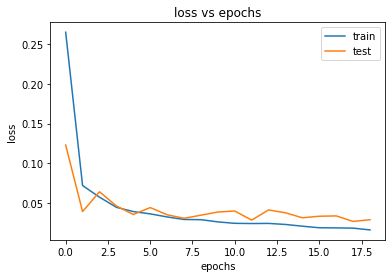

In [14]:
plt.plot(training_loss_epochs, label = "train")
plt.plot(test_loss_epochs, label = "test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.legend()
plt.show()